In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:

corpus_df = pd.read_csv('/Users/ishathukral/Downloads/DS5001project/output/CORPUS.csv', sep='|')


In [31]:

corpus_df = corpus_df[corpus_df['pos'].isin(['NN', 'VB'])]  

corpus_df = corpus_df.dropna(subset=['token_str'])  

vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=2, max_features=1000)
count_matrix = vectorizer.fit_transform(corpus_df['token_str'])
count_matrix

<307340x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 212436 stored elements in Compressed Sparse Row format>

In [37]:
from scipy.sparse import save_npz

save_npz('/Users/ishathukral/Downloads/DS5001project/output/count_matrix.npz', count_matrix)


In [8]:
n_components = 5

lda_model = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda_model.fit(count_matrix)

LatentDirichletAllocation(n_components=5, random_state=0)

In [36]:
from joblib import dump

dump(lda_model, '/Users/ishathukral/Downloads/DS5001project/output/LDA.joblib')


['/Users/ishathukral/Downloads/DS5001project/output/LDA.joblib']

In [38]:

df_count_matrix = pd.DataFrame(count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

df_count_matrix.to_csv('/Users/ishathukral/Downloads/DS5001project/output/count_matrix.csv', sep=',', index=True)


In [9]:

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda_model, vectorizer.get_feature_names_out(), n_top_words=5)


Topic #0: word grace óóóóóóóóóóó meditate servant
Topic #1: guru true pause love body
Topic #2: nanak mind mehl world heart
Topic #3: naam har gurmukh life wealth
Topic #4: lord shabad peace fifth master


In [5]:

vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(corpus_df['token_str'])

n_components = 5  
lda_model = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda_model.fit(doc_term_matrix)

theta_matrix = lda_model.transform(doc_term_matrix)

theta_df = pd.DataFrame(theta_matrix, columns=['T' + str(i) for i in range(n_components)])

delimiter = ','  
theta_df


,T0,T1,T2,T3,T4
0,0.600000,0.100000,0.100000,0.100000,0.100000
1,0.100000,0.100000,0.600000,0.100000,0.100000
2,0.600000,0.100000,0.100000,0.100000,0.100000
3,0.100000,0.100000,0.100000,0.100000,0.600000
4,0.200000,0.200000,0.200000,0.200000,0.200000
...,...,...,...,...,...
307335,0.100005,0.100008,0.100006,0.100004,0.599977
307336,0.100007,0.599973,0.100007,0.100005,0.100008
307337,0.200000,0.200000,0.200000,0.200000,0.200000
307338,0.200000,0.200000,0.200000,0.200000,0.200000


In [8]:
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(corpus_df['token_str'])

n_components = 5

lda_model = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda_model.fit(doc_term_matrix)

phi_matrix = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

phi_df = pd.DataFrame(phi_matrix.T, index=vectorizer.get_feature_names_out(), columns=['Topic' + str(i) for i in range(n_components)])

delimiter = ','

phi_df

,Topic0,Topic1,Topic2,Topic3,Topic4
aa,0.000026,0.000006,0.000005,0.000003,0.000005
aafee,0.000026,0.000006,0.000005,0.000003,0.000005
aakee,0.000004,0.000006,0.000005,0.000018,0.000005
aamaa,0.000004,0.000006,0.000005,0.000018,0.000005
aan,0.000004,0.000006,0.000005,0.000018,0.000005
...,...,...,...,...,...
yuga,0.000004,0.000006,0.003510,0.000003,0.000005
zag,0.000004,0.000037,0.000005,0.000003,0.000005
zig,0.000004,0.000037,0.000005,0.000003,0.000005
óóóóóóóóó,0.000004,0.000006,0.032765,0.000003,0.000005


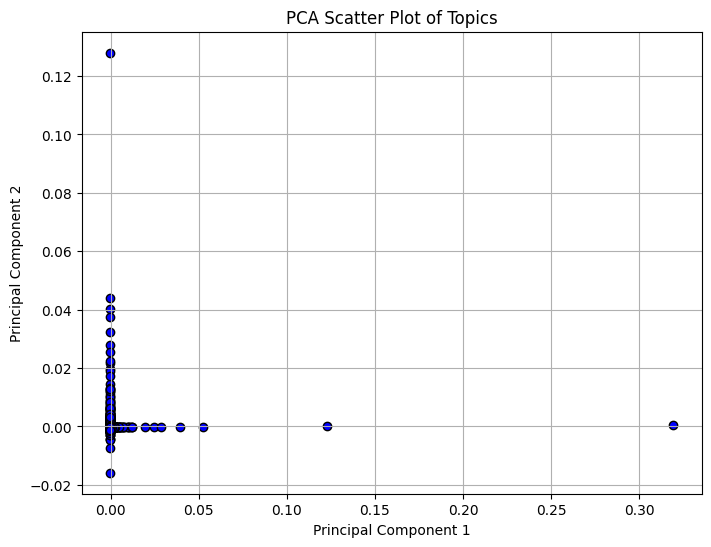

In [41]:
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(corpus_df['token_str'])

n_components = 5
lda_model = LatentDirichletAllocation(n_components=n_components, random_state=0)
lda_model.fit(doc_term_matrix)


theta_matrix = lda_model.transform(doc_term_matrix)
theta_df = pd.DataFrame(theta_matrix, columns=['Topic' + str(i) for i in range(n_components)])


phi_matrix = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
phi_df = pd.DataFrame(phi_matrix.T, index=vectorizer.get_feature_names_out(), columns=['Topic' + str(i) for i in range(n_components)])



pca = PCA(n_components=2)
phi_pca = pca.fit_transform(phi_matrix.T)


plt.figure(figsize=(8, 6))
plt.scatter(phi_pca[:, 0], phi_pca[:, 1], c='blue', marker='o', edgecolor='black')
plt.title('PCA Scatter Plot of Topics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [11]:
phi_normalized = phi_df / phi_df.sum(axis=0)

pca = PCA(n_components=2)
phi_pca = pca.fit_transform(phi_normalized.T)

phi_pca_df = pd.DataFrame(phi_pca, columns=['PC1', 'PC2'])


In [14]:

corpus_df = pd.read_csv('/Users/ishathukral/Downloads/DS5001project/output/CORPUS.csv', sep='|')

corpus_df['length'] = corpus_df.groupby('doc_id')['token_str'].transform('size')

corpus_df['length_category'] = pd.cut(corpus_df['length'], bins=[0, 200, 400, 600, 800, 2000, float('inf')],
                                      labels=['0-200', '201-400', '401-600', '601-800', '801-2000', '2000+'])

In [27]:
theta_df.to_csv('/Users/ishathukral/Downloads/DS5001project/output/THETA.csv', sep=',' , index=False)

In [39]:
phi_df.to_csv('/Users/ishathukral/Downloads/DS5001project/output/PHI.csv', sep=',' , index=True)

PCA + LDA